In [229]:
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time
from datetime import datetime



In [170]:
consumer_key='cMQU2UqjpeUcJNyp3Am6baBIH'
consumer_key_secret='kinWJPyCvybVCnd4UARz6HQ9kPa0Dl7J5H8KOjvO23VxlcF3ob'
access_token='979170194823176194-L3VffrUcA5ulSjQsUBzeQv4JX778PmB'
access_token_secret='NhsZlfUkJe8iFA7ElDN2zJbJLso8iXl8by60JPWH7I3HH'
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [220]:
target_terms = ("@BBC", "@@CBSNews", "@CNN", "@FoxNews", "@nytimes")


In [230]:
results_list=[]
target_list=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text_list=[]
tweet_date=[]
countlist=[]

for target in target_terms:
    count=0
    public_tweets = api.user_timeline(target,count=100)
    for tweet in public_tweets:
                
                user=target
                target_list.append(target)
                TDate=tweet["created_at"]
                text=tweet["text"]
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                text_list.append(text)
                tweet_date.append(TDate)
                count=count+1
                countlist.append(count)
    
#print("hi")


In [222]:

news_df=pd.DataFrame({"News":target_list,"Text":text_list,"Date":tweet_date,"Compound_Score":compound_list, \
                      "Pos_score":positive_list, \
                      "Neutral_score":neutral_list,"Neg_Score":negative_list,"Tweet_count":countlist})


In [223]:
news_df.head(20)

,Compound_Score,Date,Neg_Score,Neutral_score,News,Pos_score,Text,Tweet_count
0,0.0000,Sun Apr 08 19:02:05 +0000 2018,0.000,1.000,@BBC,0.000,😺💦 This is Maya the jaguar's very first swim! ...,1
1,0.4939,Sun Apr 08 18:03:03 +0000 2018,0.000,0.686,@BBC,0.314,😂 Need a hand getting the kids to bed? https:/...,2
2,0.2500,Sun Apr 08 17:25:08 +0000 2018,0.088,0.765,@BBC,0.147,'Silencing masks' and 'wife auctions': What li...,3
3,0.0000,Sun Apr 08 17:07:02 +0000 2018,0.000,1.000,@BBC,0.000,🦖😂 Philomena Cunk examines the barbaric condit...,4
4,0.0000,Sun Apr 08 16:40:55 +0000 2018,0.000,1.000,@BBC,0.000,RT @bbcgetinspired: Meet Sue...\n\nShe is plan...,5
5,-0.2263,Sun Apr 08 16:07:03 +0000 2018,0.106,0.894,@BBC,0.000,🎨 Victoria Lomasko is a Russian graphic artist...,6
6,0.0000,Sun Apr 08 15:31:00 +0000 2018,0.000,1.000,@BBC,0.000,🎶 The search for the next Young Musician has b...,7
7,0.0000,Sun Apr 08 15:11:04 +0000 2018,0.000,1.000,@BBC,0.000,"'If boys are getting diagnosed with autism, gi...",8
8,-0.2023,Sun Apr 08 13:54:07 +0000 2018,0.189,0.811,@BBC,0.000,💃🕺 Meet the kids cutting some serious shapes o...,9
9,0.8750,Sun Apr 08 13:23:39 +0000 2018,0.000,0.607,@BBC,0.393,RT @BBCSport: What a nice surprise 😍💍\n\nTwo o...,10


(-1.1, 1.1)

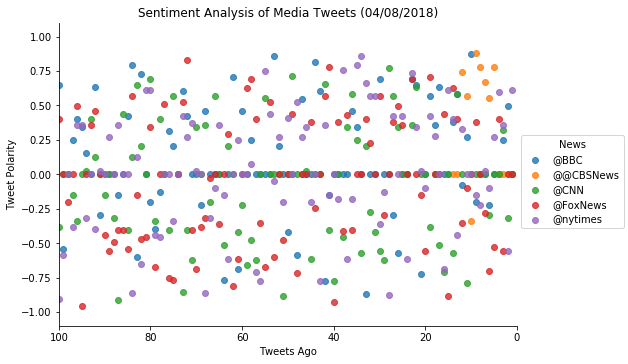

In [224]:

sns.lmplot( x="Tweet_count", y="Compound_Score", data=news_df, fit_reg=False, hue='News',aspect=1.5)
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(100,0)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)

In [225]:
news_df_g=news_df.groupby('News').mean()
news_df_g=news_df_g.reset_index()

Text(0,0.5,'Tweet Polarity')

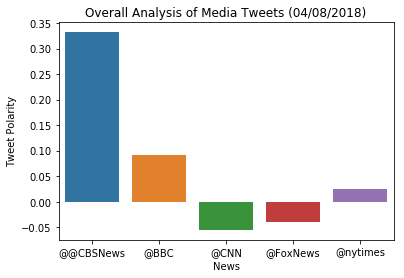

In [226]:

sns.barplot(x="News", y="Compound_Score",data=news_df_g);
plt.title("Overall Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.ylabel("Tweet Polarity")


In [227]:
#@CBSNEWS has most positive sentiments
#CNN has most negative
#NYtimes has neutral 